<a href="https://colab.research.google.com/github/salsaadityani/visualization-wordcloud/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

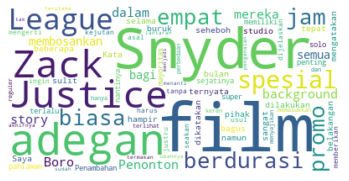

In [ ]:
text = 'Tidak ada yang spesial dari Zack Snyder Justice League. Film berdurasi hampir empat jam ini ternyata tidak seheboh promo yang dilakukan pihak studio selama beberapa bulan belakangan.'
text += 'Saya sulit untuk mengatakan Zack Snyder Justice League sebagai film yang bagus, namun tidak bisa dikatakan buruk pula. Kata yang tepat adalah biasa saja, atau sangat biasa.'
text += 'Penambahan adegan background story ini sejatinya tidak terlalu penting karena mayoritas dari pahlawan super itu memiliki film solo. Penonton pun nantinya akan mengerti asal usul mereka tanpa harus dijelaskan dalam film ini.'
text += 'Boro-boro memberikan kejutan, adegan background story justru membosankan. Snyder seakan ingin memasukkan semua adegan yang tidak ada dalam film reguler hanya untuk menyajikan perbedaan dan terlihat keren.'
text += 'Pada akhirnya semua adegan pengenalan itu tidak menjadi spesial bagi penonton, terutama bagi mereka yang sudah menanti lantaran termakan promo. Zack Snyder Justice League tak ubahnya film berdurasi empat jam yang membosankan.'

sw = set(STOPWORDS)
sw.update(['Tidak', 'tidak', 'ada', 'yang', 'dari', 'ini', 'untuk', 'sebagai', 'bisa', 'pula', 'saja', 'atau', 'karena', 'itu', 'akan', 'adalah', 'pun', 'pada'])

wordcloud = WordCloud(stopwords=sw, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
film_mask = np.array(Image.open("twitter.png"))
film_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
transformed_film_mask = np.ndarray((film_mask.shape[0],film_mask.shape[1]), np.int32)

for i in range(len(film_mask)):
    transformed_film_mask[i] = list(map(transform_format, film_mask[i]))

transformed_film_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

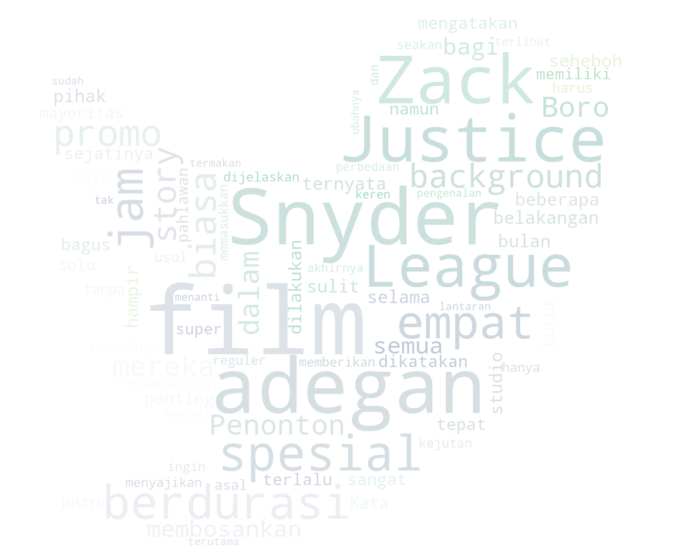

In [ ]:
wc = WordCloud(background_color="white", mode='RGBA', max_words=100, mask=transformed_film_mask, stopwords=sw).generate(text)

image_colors = ImageColorGenerator(np.array(Image.open("twitter.png")))

wc.to_file("twitter.png")

# show
plt.figure(figsize=[20,10])
#plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

Sumber: https://www.cnnindonesia.com/hiburan/20210326191327-220-622667/review-film-zack-snyders-justice-league